## Churn Prediction

Churn prediction is one of the most popular Big Data use cases in business. It consists of detecting which customers are likely to cancel a subscription to a service based on how they use the service. We want to predict the answer to the following question, asked for each current customer: “Is this customer going to leave us within the next X months?” There are only two possible answers, yes or no, and it is what we call a binary classification task. 

Here, the input to the model is customer profile information and the objective is to predict whether a customer is likely to cancel their service subscription
             
Being able to predict churn based on customer data has proven extremely valuable to big telecom companies & Financial services.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
%matplotlib inline

Data Collection 

Data Exploration

Exploratory Analysis

Feature Pre-processing

Build the Model

Evaluate & Test the model

Service Deployment (Flask)

### Data Collection

In [2]:
churn_df = pd.read_csv(r'C:\Users\Akash\Documents\Churn Prediction\train.csv')

### Data Exploration

In [3]:
churn_df.columns #Let's see how many columns this dataset has

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [4]:
#Checking the distribution of the target values
churn_df.churn.value_counts() 

no     3652
yes     598
Name: churn, dtype: int64

In [5]:
#Let's see how the dataset looks like (with top 5 rows)
churn_df.head() 

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [6]:
#Let's see how the dataset looks like (with last 5 rows) 

churn_df.tail()

state  account_length      area_code international_plan voice_mail_plan  \
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
4245                10.3                 6               2.78   
4246                11.5                 6               3.11   
4247                 6.9                 7               1.86   
4248                 9.9                 5               2.67   
4249                 9.3                16               2.51   

      number_customer_service_calls churn  
4245                              0    no  
4246                              3    no  
4247                              1    no  
4248                              2    no  
4249                              0    no

In [7]:
#Showing the shape of the dataset
print(churn_df.shape) 

(4250, 20)


In [8]:
#Let's see the data type and number of non-null records for each column of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Looking the statistical details of the dataset with both the different target values separately

In [9]:
#with the target value as 'Yes', lets check the statistical values of the dataset
churn_df[churn_df['churn'] == 'yes'].describe() 

account_length  number_vmail_messages  total_day_minutes  \
count      598.000000             598.000000         598.000000   
mean       102.137124               4.299331         208.990134   
std         39.369162              11.124649          69.183493   
min          2.000000               0.000000           0.000000   
25%         76.000000               0.000000         151.175000   
50%        101.000000               0.000000         220.550000   
75%        125.000000               0.000000         266.975000   
max        225.000000              48.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count       598.000000        598.000000         598.000000       598.000000   
mean        100.478261         35.528679         209.964883        99.841137   
std          20.988919         11.761417          51.312321        19.752909   
min           0.000000          0.000000          70.900000        48.000000   
25%          87.000000         25.697500         172.150000        87.000000   
50%         101.000000         37.495000         210.200000        99.500000   
75%         114.000000         45.385000         248.100000       113.000000   
max         165.000000         59.760000         349.400000       168.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count        598.000000           598.000000         598.000000   
mean          17.847207           206.331773          99.209030   
std            4.361545            48.959820          20.263378   
min            6.030000            47.400000          42.000000   
25%           14.635000           172.825000          84.000000   
50%           17.870000           206.100000          99.000000   
75%           21.090000           241.250000         114.000000   
max           29.700000           381.600000         158.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count          598.000000          598.000000        598.000000   
mean             9.285033           10.632441          4.217391   
std              2.203215            2.794494          2.626925   
min              2.130000            0.000000          0.000000   
25%              7.780000            8.800000          2.000000   
50%              9.275000           10.600000          4.000000   
75%             10.857500           12.700000          5.000000   
max             17.170000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count         598.000000                     598.000000  
mean            2.871254                       2.275920  
std             0.754413                       1.827334  
min             0.000000                       0.000000  
25%             2.380000                       1.000000  
50%             2.860000                       2.000000  
75%             3.430000                       4.000000  
max             5.400000                       9.000000

In [10]:
 # with the target value as 'No', lets check the statistical values of the dataset
churn_df[churn_df['churn'] == 'no'].describe()

account_length  number_vmail_messages  total_day_minutes  \
count     3652.000000            3652.000000        3652.000000   
mean        99.924973               8.177437         175.555093   
std         39.748743              13.706304          49.549782   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         142.500000   
50%         99.000000               0.000000         178.250000   
75%        127.000000              20.000000         210.700000   
max        243.000000              52.000000         313.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3652.000000       3652.000000        3652.000000      3652.000000   
mean         99.813801         29.844948         198.570674       100.231380   
std          19.659616          8.423424          49.897726        19.936117   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.230000         164.575000        87.000000   
50%         100.000000         30.300000         199.200000       100.000000   
75%         113.000000         35.820000         231.725000       114.000000   
max         160.000000         53.350000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       3652.000000          3652.000000        3652.000000   
mean          16.878743           199.577519          99.942771   
std            4.241312            50.521152          20.066126   
min            0.000000             0.000000           0.000000   
25%           13.987500           165.975000          87.000000   
50%           16.930000           199.300000         100.000000   
75%           19.692500           233.125000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         3652.000000         3652.000000       3652.000000   
mean             8.981131           10.194441          4.460570   
std              2.273463            2.749911          2.433859   
min              0.000000            0.000000          0.000000   
25%              7.470000            8.500000          3.000000   
50%              8.970000           10.300000          4.000000   
75%             10.490000           12.000000          6.000000   
max             17.770000           19.700000         19.000000   

       total_intl_charge  number_customer_service_calls  
count        3652.000000                    3652.000000  
mean            2.753018                       1.441676  
std             0.742466                       1.165159  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.320000                       8.000000

In [11]:
#Getting the summation of all the rows with null value for each categorical features
churn_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [12]:
#Identifying the number of unique values for each column(feature)
churn_df.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

<AxesSubplot:xlabel='number_vmail_messages'>

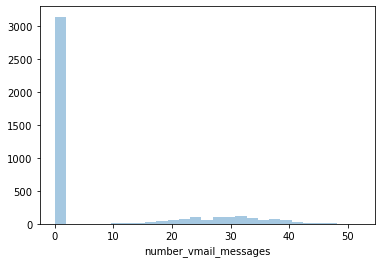

In [13]:
#Distribution of the feature 'number_vmail_messages' 

sns.distplot(churn_df['number_vmail_messages'],kde= False)
# We can see most of the values of the feature is 

<AxesSubplot:xlabel='account_length'>

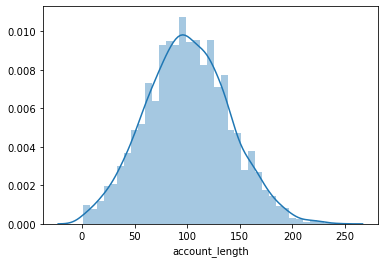

In [14]:
# Here, the mean of 'account length' is approx 100 months. Looks like a perfect normal distribution
sns.distplot(churn_df['account_length'])

<AxesSubplot:xlabel='total_intl_calls'>

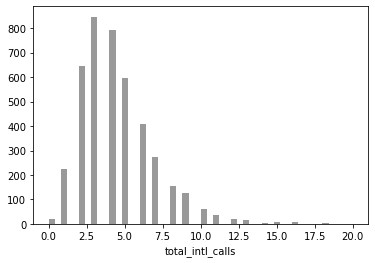

In [15]:
#Distribution of total_intl_calls (Right-skewed Normal distribution) 
sns.distplot(churn_df['total_intl_calls'],kde=False,color= 'Black')

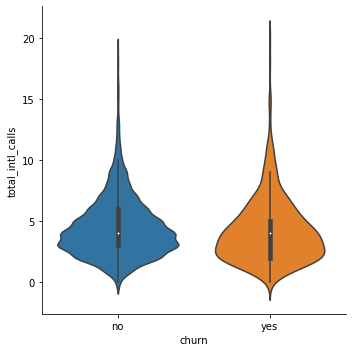

In [16]:
#Both Churn and non-Churn data have almost similiar behaviour w.r.t total_intl_calls
sns.catplot(x='churn',y='total_intl_calls',data =churn_df,kind= 'violin')

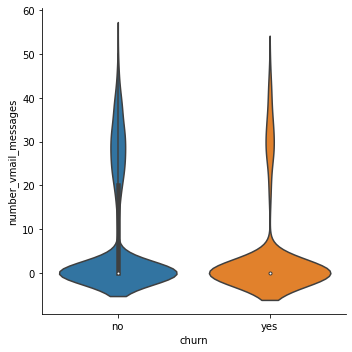

In [17]:
sns.catplot(x='churn',y='number_vmail_messages',data =churn_df,kind= 'violin')
# Both Churn and non-Churn data have most records clusttered at 0 w.r.t number_vmail_messages feature.

<AxesSubplot:>

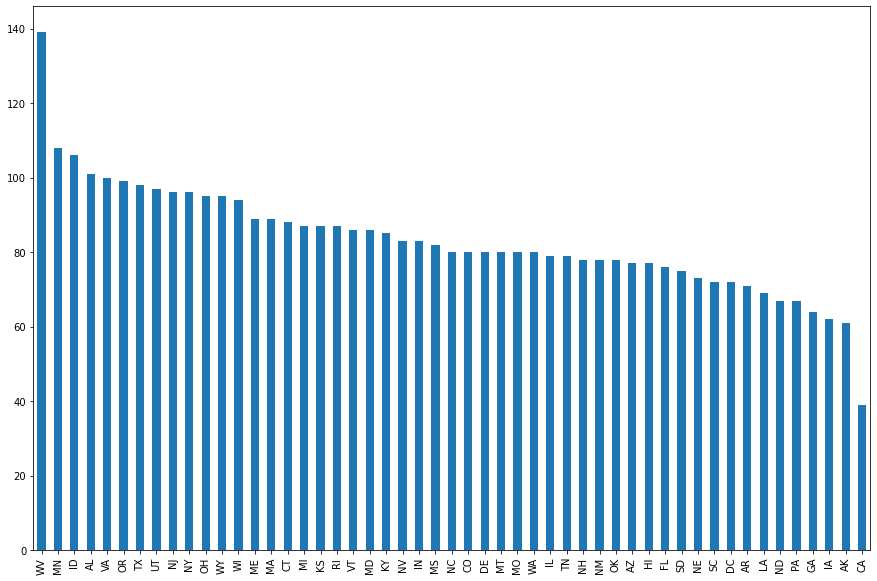

In [18]:
# Let's see the distribution of the data on the state feature.
plt.figure(figsize=(15,10))
churn_df['state'].value_counts().plot(kind='bar')

State 'WV' has maximum data and 'CA' has the least data

<AxesSubplot:>

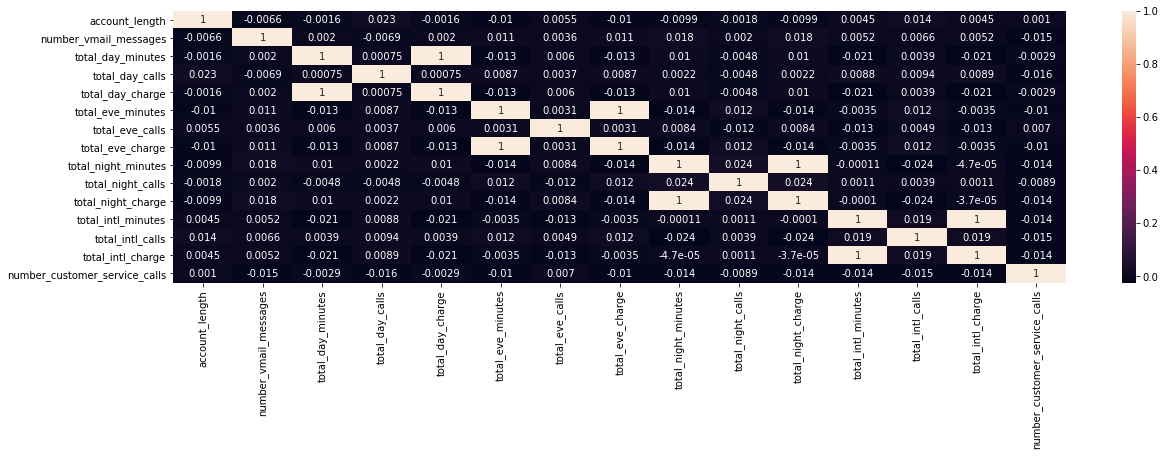

In [19]:
#heatmap of the features
corelation = churn_df.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot = True)

In [20]:
#Segregating the features and target from the dataset
churn_data_X= churn_df.iloc[:,:-1]
churn_data_y = churn_df.iloc[:,-1]

In [21]:
# Let's see the first five rows of churn_data_X
churn_data_X.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  
0                              1  
1                              0  
2                              2  
3                              3  
4                              3

In [22]:
churn_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [23]:
# Lets see the last five rows of churn_data_y(target variable)
print(churn_data_y.tail())

4245    no
4246    no
4247    no
4248    no
4249    no
Name: churn, dtype: object


In [24]:
#one hot encoding
# We are applying one hot encoding to convert the categorical values into numerical values through different columns
churn_X_new= pd.get_dummies(churn_data_X)
churn_X_new.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             107                     26              161.6              123   
1             137                      0              243.4              114   
2              84                      0              299.4               71   
3              75                      0              166.7              113   
4             121                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  ...  state_WI  state_WV  state_WY  \
0                254.4                103  ...         0         0         0   
1                162.6                104  ...         0         0         0   
2                196.9                 89  ...         0         0         0   
3                186.9                121  ...         0         0         0   
4                212.6                118  ...         0         0         0   

   area_code_area_code_408  area_code_area_code_415  area_code_area_code_510  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        0                        1                        0   
4                        0                        0                        1   

   international_plan_no  international_plan_yes  voice_mail_plan_no  \
0                      1                       0                   0   
1                      1                       0                   1   
2                      0                       1                   1   
3                      0                       1                   1   
4                      1                       0                   0   

   voice_mail_plan_yes  
0                    1  
1                    0  
2                    0  
3                    0  
4                    1  

[5 rows x 73 columns]

In [25]:
print('The shape of churn_X_new after applying one hot encoding')
print(churn_X_new.shape)

The shape of churn_X_new after applying one hot encoding
(4250, 73)


In [26]:
#Let's see the new columns
churn_X_new.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', '

<AxesSubplot:>

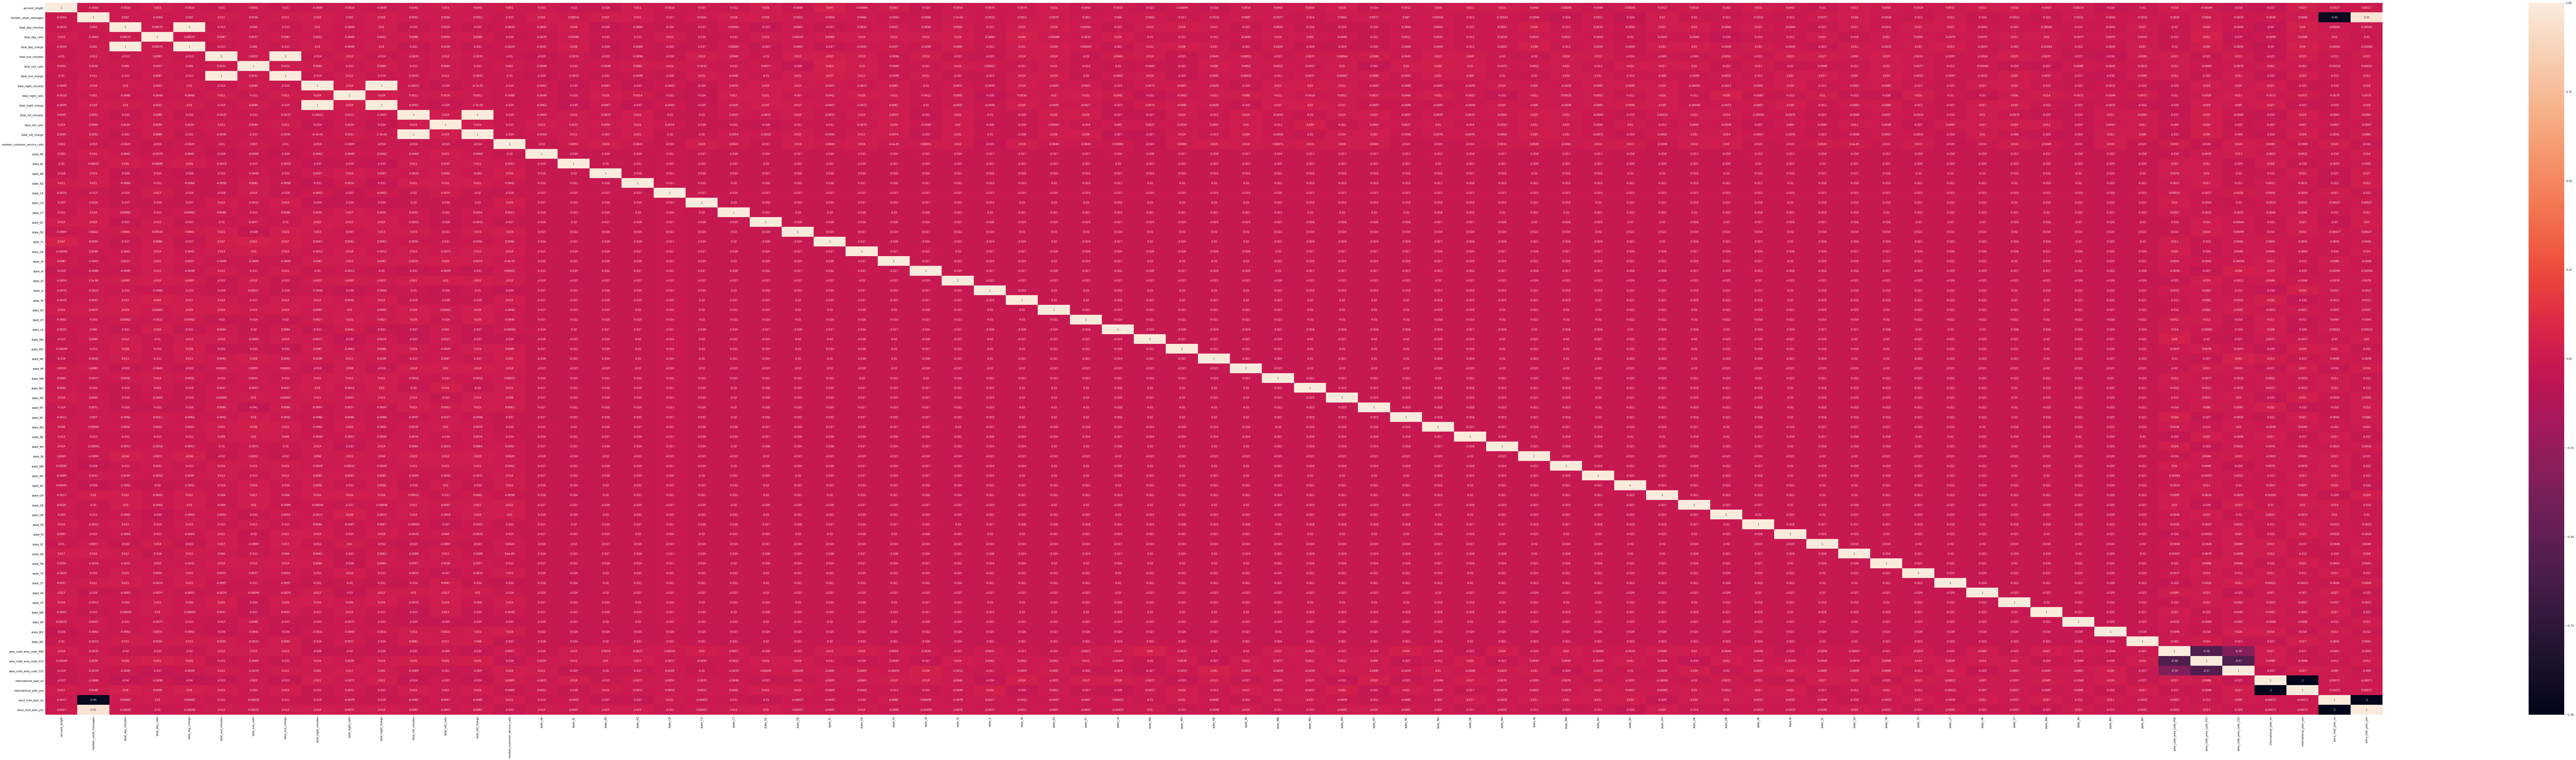

In [27]:
correlation = churn_X_new.corr()
plt.figure(figsize = (200,50))
sns.heatmap(correlation, xticklabels = correlation.columns,yticklabels =correlation.columns,annot = True)

C:\Users\Akash\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


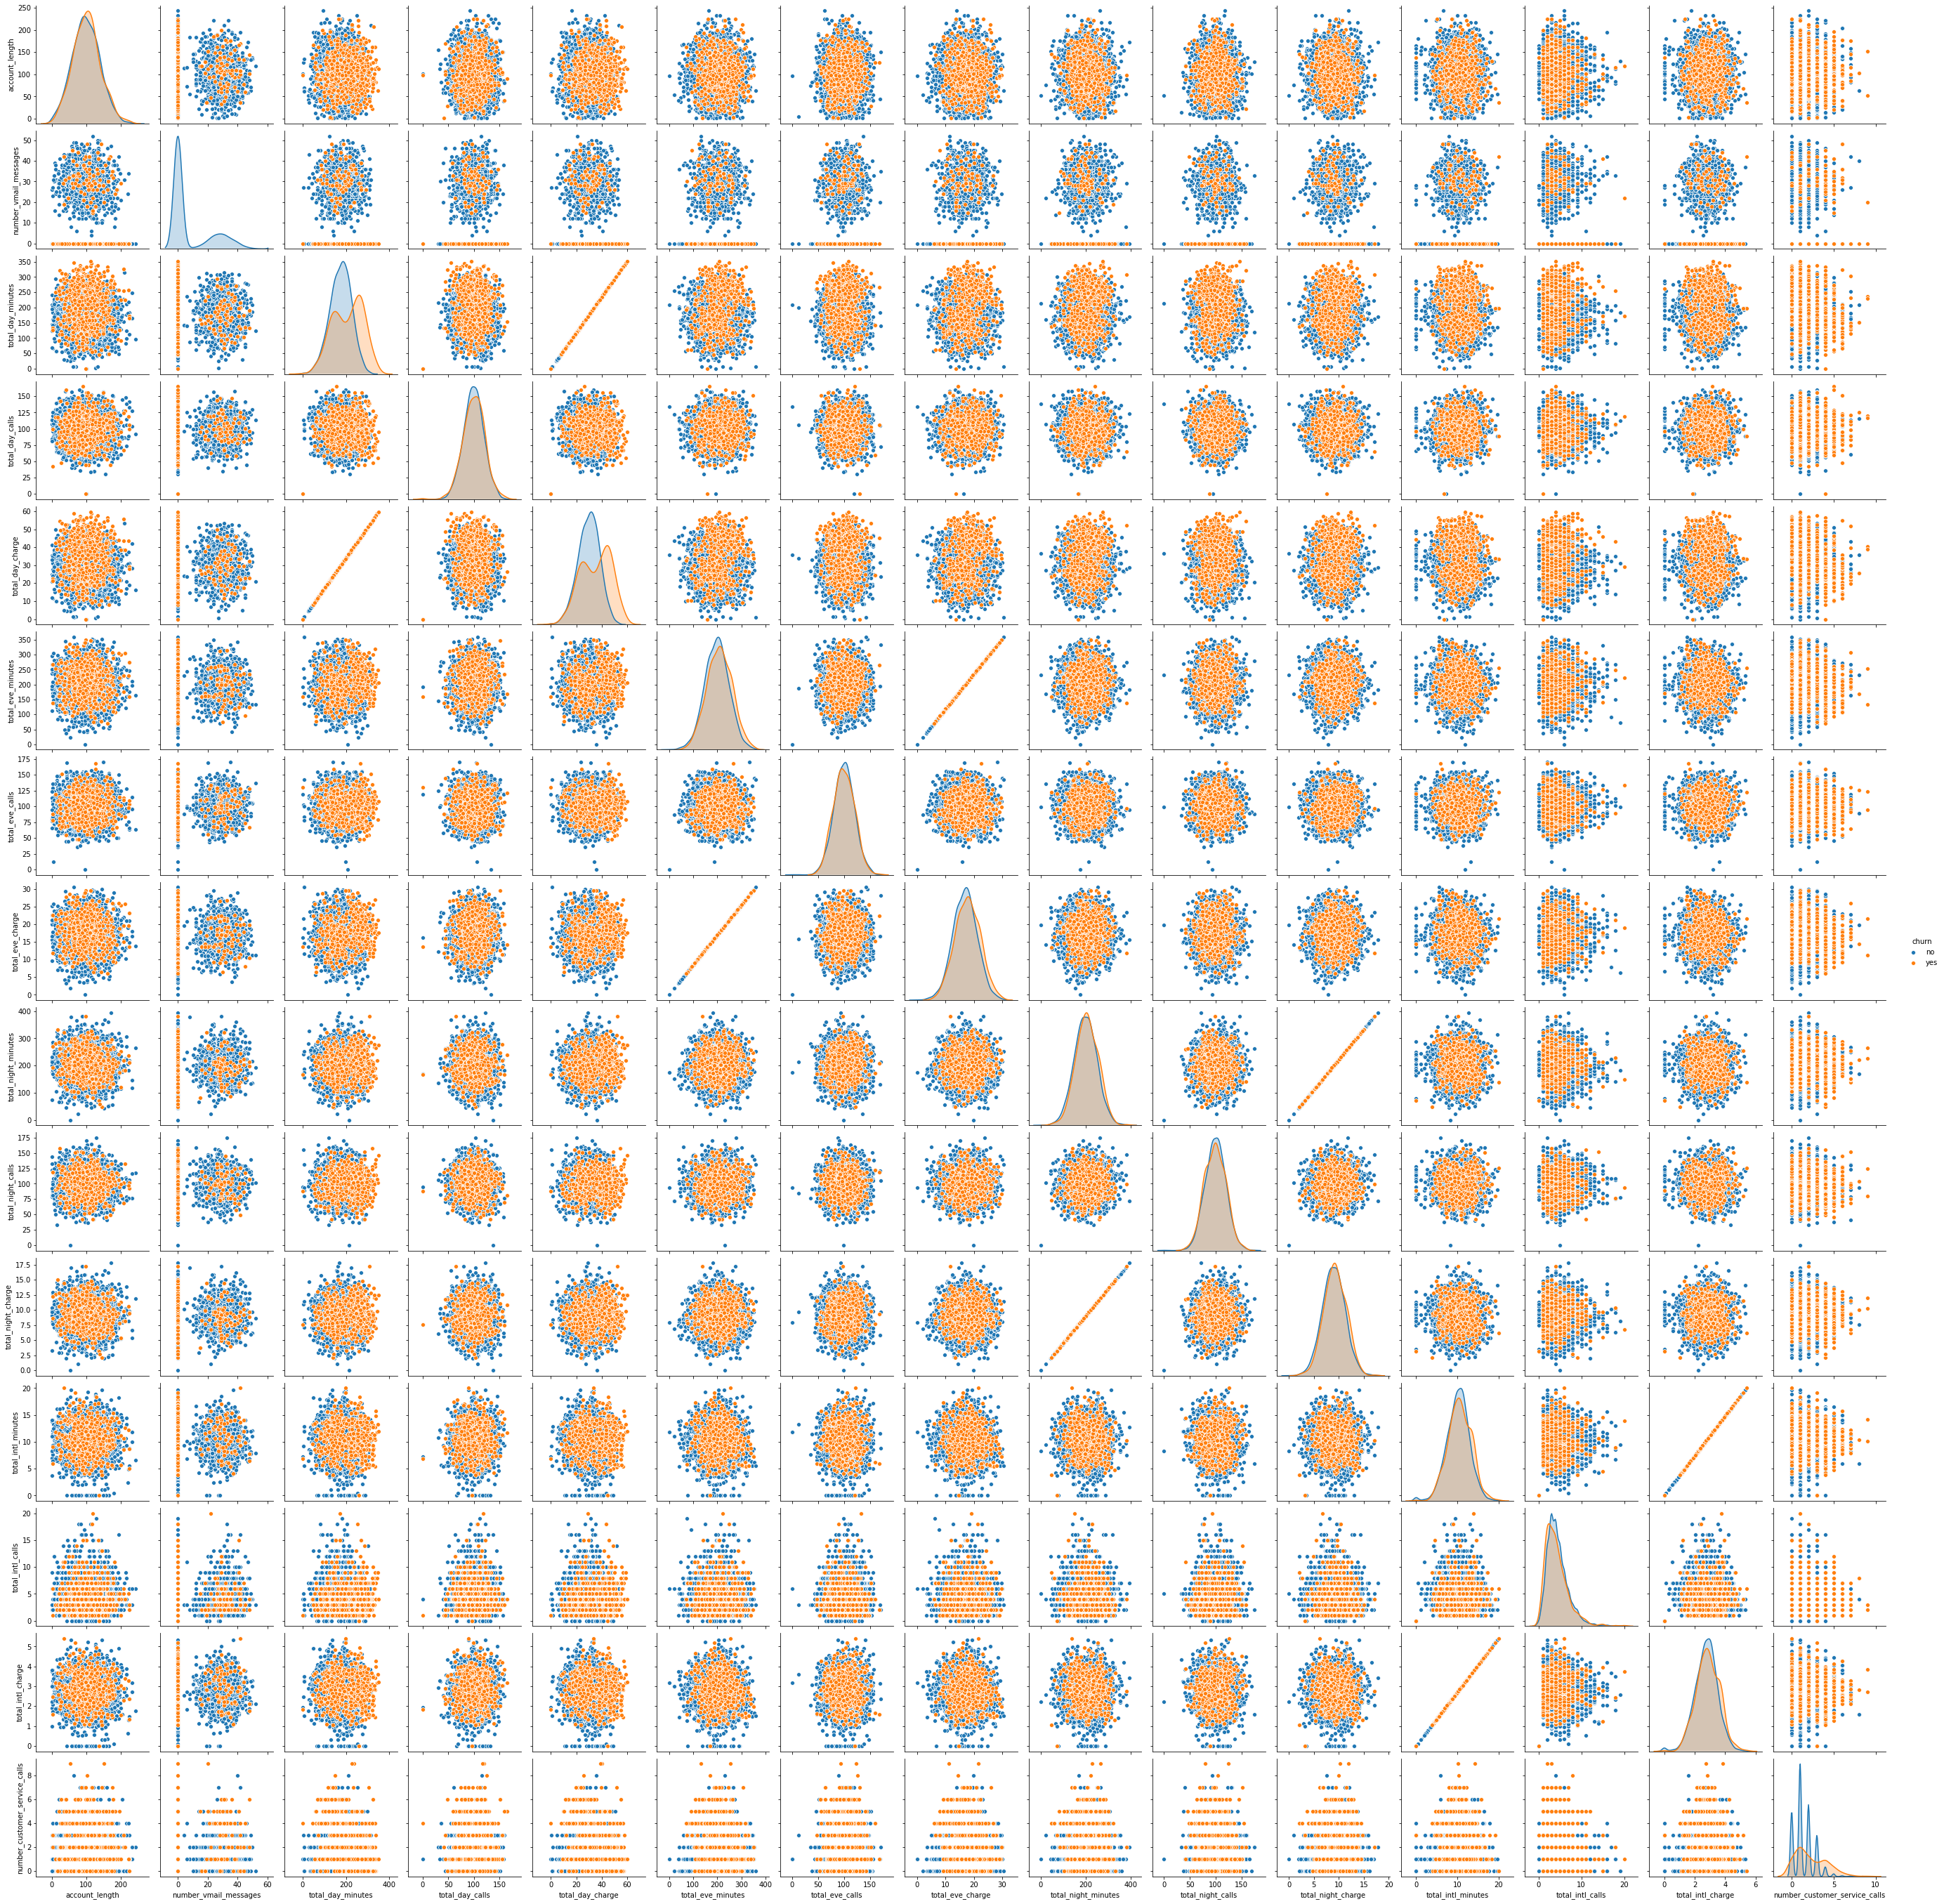

In [28]:
sns.pairplot(churn_df,hue='churn')

### Perform Test and Train split
By using train_test_split we have split the data into traing dataset and testing datasets.

In [29]:
X_train_va,X_test,y_train_va,y_test = train_test_split(churn_X_new,churn_data_y,test_size = 0.1, random_state = 0, stratify = churn_data_y)

As the dataset is imbalanced, we rae applying SMOTE (oversampling technique) to make the target values (yes & no) in equal proportion

In [30]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42,sampling_strategy = 0.5)
X_train_val,y_train_val = sm.fit_resample(X_train_va, y_train_va)
print('Target value distribution before applying SMOTE:')
print(y_train_va.value_counts(),end = '\n\n')
print('Target value distribution after applying SMOTE:')
print(y_train_val.value_counts())

Target value distribution before applying SMOTE:
no     3287
yes     538
Name: churn, dtype: int64

Target value distribution after applying SMOTE:
no     3287
yes    1643
Name: churn, dtype: int64


Now Let's apply Grid serach Cross Validation on our train-validation dataset to find the best parameters.
After, we find the best parameters, we shall check accuracy of the classifier on the test dataset(By best parameters, we are referring to the values of certain parameters that gives the best accuracy on the validation dataset)
Here we have used k=10 in n-fold cross Validation

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[19,20,21,22], 'max_features':[19,20,21]}
churn_predict_RF = RandomForestClassifier
churn_predictor_RF=churn_predict_RF()
clf = GridSearchCV(churn_predictor_RF, parameters,cv =10)
clf_RF= clf
clf_RF.fit(X_train_val,y_train_val)
print(clf_RF.best_params_)
val_accuracy_RF= clf_RF.cv_results_['mean_test_score'].mean()
print(val_accuracy_RF)

{'max_features': 20, 'n_estimators': 22}
0.9548512508451656


Through 'best_params_' method of GridSearchCV, we could find the best parameter values. 
Now Let's check the accuracy on the test dataset

In [32]:
y_test_pred= clf_RF.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9647058823529412

Checking the confusion matrix which is applied on the test data...

In [33]:
confuse_matrix= confusion_matrix(y_test,y_test_pred)
print(confuse_matrix)

[[362   3]
 [ 12  48]]


Here, we find the type-I error is 3 & Type -II error is 12

Now, Lets apply LIME

In [34]:
import lime
import lime.lime_tabular

In [35]:
predict_fn_rf = lambda x: clf_RF.predict_proba(x).astype(float)
X = X_train_va.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train_va.columns,class_names=['Not churn','churn'],kernel_width=5)

In [36]:
X_test.iloc[[20]]

account_length  number_vmail_messages  total_day_minutes  \
2230              63                      0              180.5   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
2230              126             30.69              230.0               98   

      total_eve_charge  total_night_minutes  total_night_calls  ...  state_WI  \
2230             19.55                232.5                 73  ...         0   

      state_WV  state_WY  area_code_area_code_408  area_code_area_code_415  \
2230         0         0                        0                        1   

      area_code_area_code_510  international_plan_no  international_plan_yes  \
2230                        0                      1                       0   

      voice_mail_plan_no  voice_mail_plan_yes  
2230                   1                    0  

[1 rows x 73 columns]

In [37]:
choosen_instance = X_test.iloc[[20]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

In [38]:
choosen_instance = X_test.iloc[[421]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)